In [1]:
import pandas as pd
from transformers import  BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
import numpy as np
import tensorflow
from keras.preprocessing.text import Tokenizer

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Loading data
df3=pd.read_csv('tokens.csv', sep=';',encoding='UTF-8')
df2=pd.read_csv('tokens_09_07_2023.csv', sep=';')
df1=pd.read_csv('tokens_25_07_2023.csv', sep=';')
df4=pd.read_csv('tokens_30_07_2023.csv', sep=';')
df5=pd.read_csv('tokens_01_08_2023.csv', sep=';')
df6=pd.read_csv('tokens_12_08_2023.csv', sep=';')
df7=pd.read_csv('tokens_14_08_2023.csv', sep=';')
df8=pd.read_csv('tokens_15_08_2023.csv', sep=';')
df9=pd.read_csv('tokens_18_08_2023.csv', sep=';')
df10=pd.read_csv('tokens_21_08_2023.csv', sep=';')
df11=pd.read_csv('tokens_22_08_2023.csv', sep=';')

tokens=pd.concat([df4,df3,df2,df1,df5,df6,df7,df8,df9,df10,df11],ignore_index=True)

In [3]:
#Transform Data to String and inter
tokens['token']=tokens['token'].astype('str')
tokens['sentimento']=tokens['sentimento'].astype('int')

In [4]:
token_split=[]
for t in tokens['token']:
    token_split.append(t.split(' '))



In [5]:
bow=[]
for i in token_split:
    for j in i:
        bow.append(j)
qtd_words=len(set(bow))

In [6]:
texto2=list(tokens['token'].iloc[:])
texto2

['Supremo terá julgamentos decisivos no segundo semestre',
 'Alphabet, Microsoft ou Meta? Itaú BBA elege nova preferida após resultados das três techs',
 'Haddad: Troca de diretores nesse primeiro ano já vai arejar muito debate do Copom, que deveria reduzir Selic em 0,50',
 'China perde espaço nas recomendações com dados decepcionantes ainda compensa investir no país?',
 'Juros do cheque especial registram alta em junho, aponta BC',
 'Reunião do Copom, “payroll” nos EUA, balanços de Petrobras, Bradesco e Apple: o que acompanhar na semana',
 'Multiplan vê aceleração das vendas nos shoppings com melhoria da economia',
 'Eternit (ETER3) troca de presidente para sair de recuperação judicial e planeja aquisições',
 'Fávaro: Japão trabalhará junto com o Brasil para estruturar a conversão de pastagens degradadas',
 'Haddad: Agenda de agosto da Câmara está alinhada com marco de garantias e marco fiscal',
 'Ficou sabendo? FMI e Argentina firmam acordo expansão do BRICS',
 'E mais: Juros reais n

In [7]:
tokenizer=Tokenizer(num_words=qtd_words)
tokenizer.fit_on_texts(texto2)
sequences=tokenizer.texts_to_sequences(texto2)
one_hot_results=tokenizer.texts_to_matrix(texto2,mode='binary')
word_index=tokenizer.word_index
len(one_hot_results[:])

1737

In [8]:
df_vector=pd.DataFrame(columns=range(0,len(one_hot_results)), index=range(0,len(one_hot_results)))

In [9]:
#Create DataFrame with phrases tokenized
df_vector=pd.DataFrame(columns=range(0,one_hot_results.shape[1]), index=range(0,len(one_hot_results)))
for i in range(len(one_hot_results)):
    df_vector.iloc[i]=one_hot_results[i]
df_vector['sentimento']=tokens['sentimento']
df_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,8427,8428,8429,8430,8431,8432,8433,8434,8435,sentimento
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [10]:
#train and test split
X_train,X_test,y_train,y_test = train_test_split (df_vector.drop('sentimento',axis=1),df_vector['sentimento'], random_state=0, test_size=0.3)

In [11]:
#Instancing and fit Random Forest Classifier
params = {
    'n_estimators': [10,50,100,200],
    'criterion': ['gini','entropy','log_loss'],
    'n_jobs': [-1],
    'max_depth': [100,20,50],
    
}

gsr = GridSearchCV(RandomForestClassifier(random_state=0), params, cv = 5, verbose=2, n_jobs = -1)
gsr.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 20, 50],
                         'n_estimators': [10, 50, 100, 200], 'n_jobs': [-1]},
             verbose=2)

In [21]:
#Check best estimator of GrindSearch
gsr.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [20]:
#Train with best estimator
gsr.best_estimator_.fit(X_train,y_train)

#Predict with best estimator
pred_test = gsr.best_estimator_.predict(X_test)
pred_train = gsr.best_estimator_.predict(X_train)
print('Classification Test :\n ',classification_report(y_test,pred_test))
print('Classification Train :\n ',classification_report(y_train,pred_train))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Overfitting

In [24]:
#Instancing and fit Random Forest Classifier
params = {
    'n_estimators': [100],
    'criterion': ['entropy'],
    'n_jobs': [-1],
    'max_depth': [25],
    
}

gsr = GridSearchCV(RandomForestClassifier(random_state=0), params, cv = 5, verbose=2, n_jobs = -1)
gsr.fit(X_train, y_train)
#Train with best estimator
print(gsr.best_estimator_)
gsr.best_estimator_.fit(X_train,y_train)

#Predict with best estimator
pred_test = gsr.best_estimator_.predict(X_test)
pred_train = gsr.best_estimator_.predict(X_train)
print('Classification Test :\n ',classification_report(y_test,pred_test))
print('Classification Train :\n ',classification_report(y_train,pred_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForestClassifier(criterion='entropy', max_depth=25, n_jobs=-1,
                       random_state=0)
Classification Test :
                precision    recall  f1-score   support

          -1       0.64      0.13      0.22       119
           0       0.52      0.91      0.66       209
           1       0.65      0.43      0.52       194

    accuracy                           0.56       522
   macro avg       0.60      0.49      0.47       522
weighted avg       0.59      0.56      0.51       522

Classification Train :
                precision    recall  f1-score   support

          -1       0.99      0.48      0.65       300
           0       0.66      1.00      0.79       482
           1       0.98      0.76      0.86       433

    accuracy                           0.79      1215
   macro avg       0.88      0.75      0.77      1215
weighted avg       0.86      0.79      0.78      1215



Arvore de Decisao

In [30]:
#Definindo os parâmetros que queremos variar/otimizar

params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [30],
    
}

#rodando o modelo com os vários parâmetros, 
#cv = 5 é o número de "folds" utilizados, 
#verbose =  para plotar informações na tela

gst = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv = 5, verbose=2)
gst.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................criterion=gini, max_depth=30; total time=   0.7s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.6s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.6s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.6s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=30; total time=   0.6s
[CV] END ....................criterion=entropy, max_depth=30; total time=   0.6s
[CV] END ....................criterion=entropy, max_depth=30; total time=   0.6s
[CV] END ....................criterion=entropy, max_depth=30; total time=   0.6s
[CV] END ....................criterion=entropy, max_depth=30; total time=   0.5s
[CV] END ...................criterion=log_loss, max_depth=30; total time=   0.6s
[CV] END ...................criterion=log_loss, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [30]},
             verbose=2)

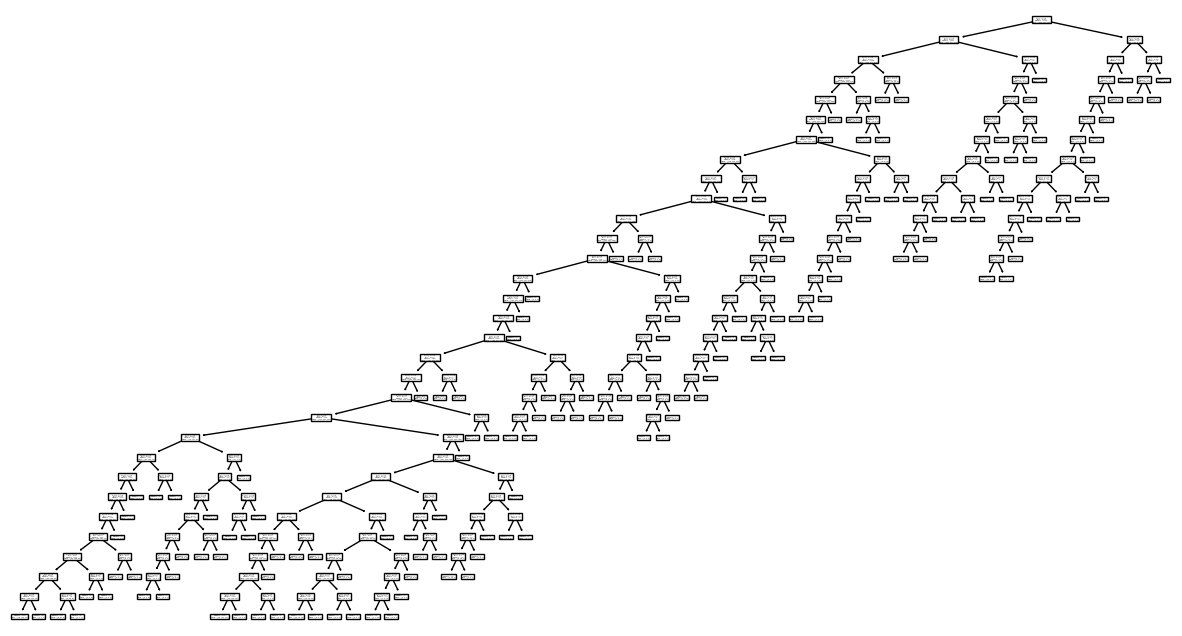

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(gst.best_estimator_)
plt.show()

In [32]:
print(gst.best_estimator_)

DecisionTreeClassifier(max_depth=30, random_state=0)


In [33]:
gst.best_estimator_.fit(X_train,y_train)
pred_test = gst.best_estimator_.predict(X_test)
pred_train = gst.best_estimator_.predict(X_train)
print('Score no teste: \n', classification_report(y_test,pred_test))
print('Score no treino: \n', classification_report(y_train,pred_train))

Score no teste: 
               precision    recall  f1-score   support

          -1       0.46      0.39      0.42       119
           0       0.53      0.78      0.63       209
           1       0.57      0.34      0.42       194

    accuracy                           0.52       522
   macro avg       0.52      0.50      0.49       522
weighted avg       0.53      0.52      0.51       522

Score no treino: 
               precision    recall  f1-score   support

          -1       0.82      0.65      0.73       300
           0       0.64      0.94      0.76       482
           1       0.95      0.58      0.72       433

    accuracy                           0.74      1215
   macro avg       0.80      0.73      0.74      1215
weighted avg       0.80      0.74      0.74      1215

